# Do high-volatility days have different next-day returns than low-volatility days?

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np


In [38]:
# import data
spy = yf.download('SPY', start = '2010-01-01')
spy.head()

C:\Users\41965\AppData\Local\Temp\ipykernel_2896\2828148711.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download('SPY', start = '2010-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2010-01-04,85.027977,85.072991,83.662488,84.307720,118944600
2010-01-05,85.253044,85.290560,84.667835,84.975448,111579900
2010-01-06,85.313049,85.523124,85.102975,85.170496,116074400
2010-01-07,85.673195,85.778232,84.915422,85.155508,131091100
2010-01-08,85.958298,85.995813,85.275556,85.448115,126402800


In [39]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4056 entries, 2010-01-04 to 2026-02-18
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, SPY)   4056 non-null   float64
 1   (High, SPY)    4056 non-null   float64
 2   (Low, SPY)     4056 non-null   float64
 3   (Open, SPY)    4056 non-null   float64
 4   (Volume, SPY)  4056 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 190.1 KB


In [40]:
# Calculate returns
spy['return'] = spy['Close'].pct_change()
spy = spy.dropna()

In [7]:
spy.head()

Price,Close,High,Low,Open,Volume,return
Ticker,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,
2010-01-05,85.253052,85.290567,84.667843,84.975456,111579900,0.002647
2010-01-06,85.313072,85.523147,85.102998,85.170519,116074400,0.000704
2010-01-07,85.673203,85.778240,84.915429,85.155515,131091100,0.004221
2010-01-08,85.958305,85.995821,85.275564,85.448122,126402800,0.003328
2010-01-11,86.078354,86.378457,85.710718,86.340947,106375700,0.001397


<Axes: >

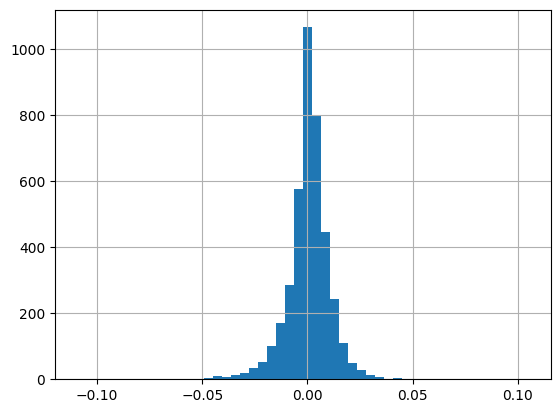

In [41]:
spy['return'].hist(bins = 50)

In [42]:
# Calculate volatility
spy['volatility_20'] = spy['return'].rolling(20).std()
spy['volatility_60'] = spy['return'].rolling(60).std()
spy = spy.dropna()

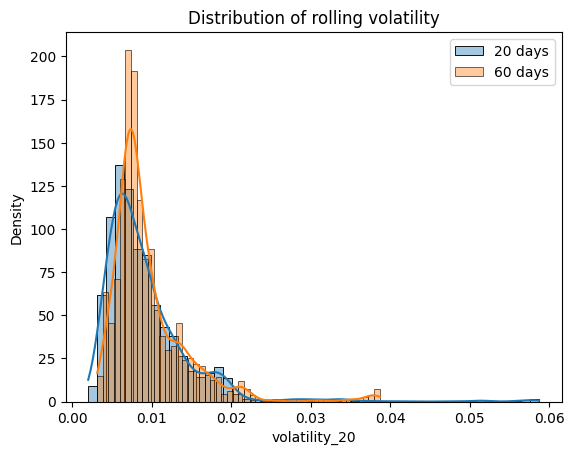

In [58]:
# Distribution of volatility in 20 days and 60 days

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(spy['volatility_20'], bins = 50, kde = True, stat = 'density', alpha = 0.4, label = '20 days')
sns.histplot(spy['volatility_60'], bins = 50, kde = True, stat = 'density', alpha = 0.4, label = '60 days')

plt.legend()
plt.title('Distribution of rolling volatility')
plt.show()

<Axes: >

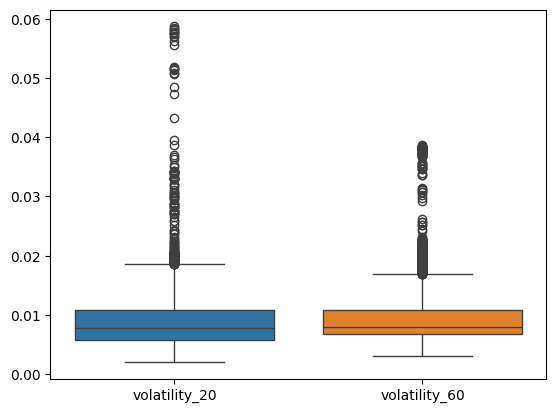

In [60]:
import seaborn as sns
sns.boxplot([spy['volatility_20'], spy['volatility_60']])

In [61]:
# Define high and low volatility
low_vola_20 = spy['volatility_20'].quantile(0.2)
high_vola_20 = spy['volatility_20'].quantile(0.8)
low_vola_60 = spy['volatility_60'].quantile(0.2)
high_vola_60 = spy['volatility_60'].quantile(0.8)

In [62]:
spy['next_return'] = spy['return'].shift(-1)
spy = spy.dropna()

In [66]:
high_vola_short = spy[spy['volatility_20'] >=  high_vola_20]
low_vola_short = spy[spy['volatility_20'] <= low_vola_20]
high_vola_long = spy[spy['volatility_60'] >=  high_vola_60]
low_vola_long = spy[spy['volatility_60'] <= low_vola_60]

In [65]:
# Calculate mean value of volatility
short_high_mean = high_vola_short['next_return'].mean()
short_low_mean = low_vola_short['next_return'].mean()

long_high_mean = high_vola_long['next_return'].mean()
long_low_mean = low_vola_long['next_return'].mean()

print("High vola return (20 days) mean:", short_high_mean)
print("Low vola return (20 days) mean:", short_low_mean)
print("High vola return (60 days) mean:", long_high_mean)
print("Low vola return (60 days) mean:", long_low_mean)

High vola return (20 days) mean: 0.0008573231651387639
Low vola return (20 days) mean: 0.0002564018244521829
High vola return (60 days) mean: 0.0011185893823922434
Low vola return (60 days) mean: 0.00017735172693946838


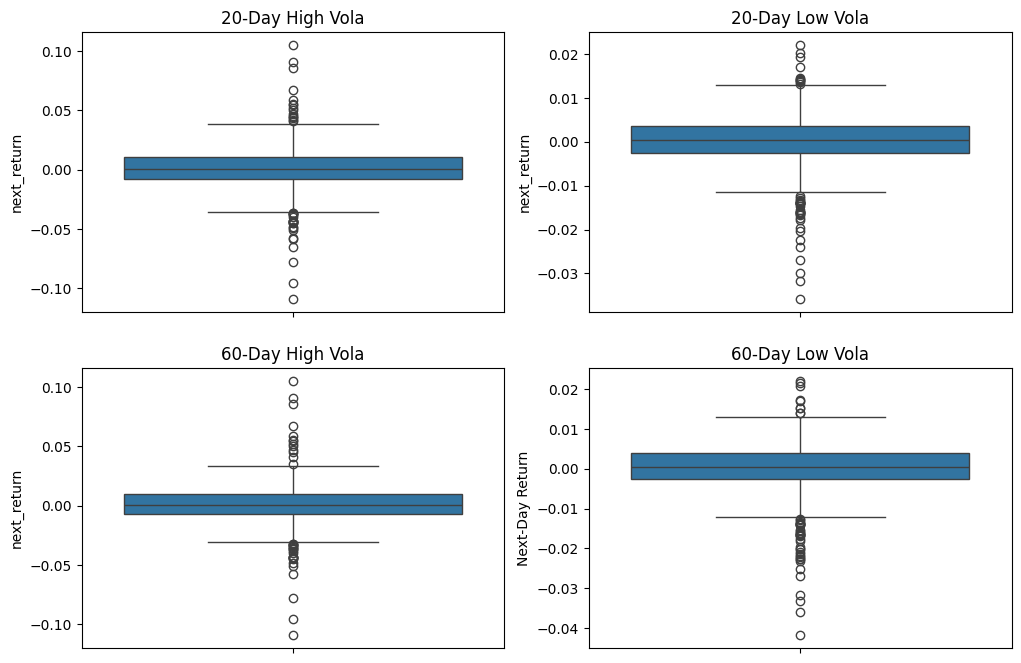

In [69]:
# Plot the boxplots of next_return in different regimes.
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(high_vola_short['next_return'], ax=axes[0, 0])
axes[0, 0].set_title("20-Day High Vola")

sns.boxplot(low_vola_short['next_return'], ax = axes[0, 1])
axes[0, 1].set_title('20-Day Low Vola')

sns.boxplot(high_vola_long['next_return'], ax=axes[1, 0])
axes[1, 0].set_title("60-Day High Vola")

sns.boxplot(low_vola_long['next_return'], ax = axes[1, 1])
axes[1, 1].set_title('60-Day Low Vola')

plt.ylabel("Next-Day Return")
plt.show()


In [71]:
# Calculate the p-value in t test.
from scipy import stats

t_stat_short, p_value_short = stats.ttest_ind(
    high_vola_short["next_return"],
    low_vola_short["next_return"],
    equal_var=False
)
t_stat_long, p_value_long = stats.ttest_ind(
    high_vola_long["next_return"],
    low_vola_long["next_return"],
    equal_var=False
)

print("T-stat_short:", t_stat_short)
print("T-stat_long:", t_stat_long)

print("P-value_short:", p_value_short)
print("P-value_long:", p_value_long)

T-stat_short: 0.8827773106093212
T-stat_long: 1.4477222047813916
P-value_short: 0.37757413442210896
P-value_long: 0.1479963139798004


#### Both short and long term have p-value larger than 0.05 -- failed to reject the null hypothesis. 